In [1]:
# The goal of this project is to predict the sales of BigMart for its various points of sales  using Machine Learning. 
# We are going to use the data from Kaggle page (https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data).

In [2]:
# let’s import the libraries we are going to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
# Loading the dataset using pandas
df = pd.read_csv('train.csv')

In [4]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium           

In [5]:
# It contains 12 columns and 8523 rows.
# Columns:
# Item_Identifier :identifier of item
# Item_Weight : the weight of item
# Item_Fat_Content: item fat content
# Item_Visibility : visibility of item
# Item_Type: type of item (meat, fruits,...)
# Item_MRP: Maximum retail price of item
# Outlet_Identifier : identifier of the outlet
# Outlet_Establishment_Year : Outlet Establishment Year
# Outlet_Size: Size of the outlet
# Outlet_Location_Type: Location of the outlet
# Outlet_Type : type of outlet
# Item_Outlet_Sales: the sales of each items in the different BigMart Outlet

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Missing data in percentage
Item_Identifier               0.00
Item_Weight                  17.17
Item_Fat_Content              0.00
Item_Visibility               0.00
Item_Type                     0.00
Item_MRP                      0.00
Outlet_Identifier             0.00
Outlet_Establishment_Year     0.00
Outlet_Size                  28.28
Outlet_Location_Type          0.00
Outlet_Type                   0.00
Item_Outlet_Sales             0.00
dtype: float64


In [6]:
# Let's know the type of data
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
# Statistical analysis of the data
# count: number of non-null data in column
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: maximum column value
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Categorical Features:

# Item_Identifier
# Item_Fat_Content
# Item_Type
# Outlet_Identifier
# Outlet_Size
# Outlet_Location_Type
# Outlet_Type

In [9]:
# Let's see the content of categorical features
print('Item_Fat_Content:', df.Item_Fat_Content.unique())
print('Item_Type:', df.Item_Type.unique())
print('Outlet_Size:', df.Outlet_Size.unique())
print('Outlet_Location_Type:', df.Outlet_Location_Type.unique())
print('Outlet_Type:', df.Outlet_Type.unique())

Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size: ['Medium' nan 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [10]:
# Handling Missing Values
# The dataset contains null values in two columns: Item_Weight and Outlet_Size.
# Let's fill them with the mean value (average value) and mode value (more repeated value).

# Mean value of "Item_Weight" column
df['Item_Weight'].mean()

12.857645184136183

In [11]:
# Filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [12]:
# Mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
dtype: object

In [13]:
# Filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
miss_values = df['Outlet_Size'].isnull()   
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
# Checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
# DATA ANALYSIS

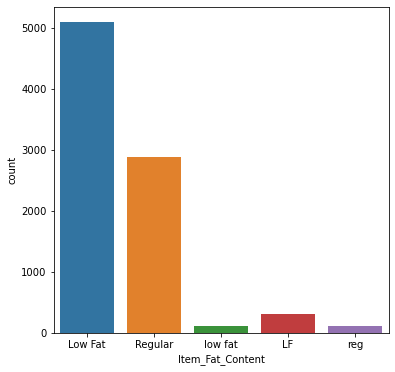

In [19]:
# Item_Fat_Content 
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.savefig('Item_Fat_Content.jpg')
plt.show()

In [20]:
# There are repeating elements with different names
# Let's reduce them to just two.
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
fat_content = {"low fat": "Low Fat",
               "LF": "Low Fat",
               "reg":"Regular"}
df["Item_Fat_Content"]= df["Item_Fat_Content"].replace(fat_content)

In [22]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

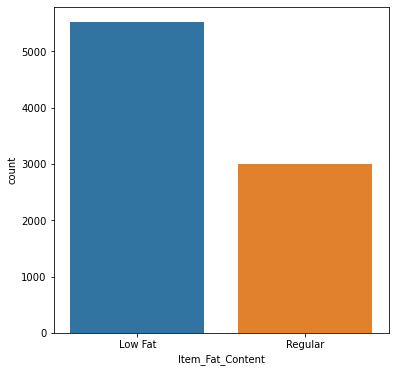

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.savefig('Item_Fat_Content.jpg')
plt.show()

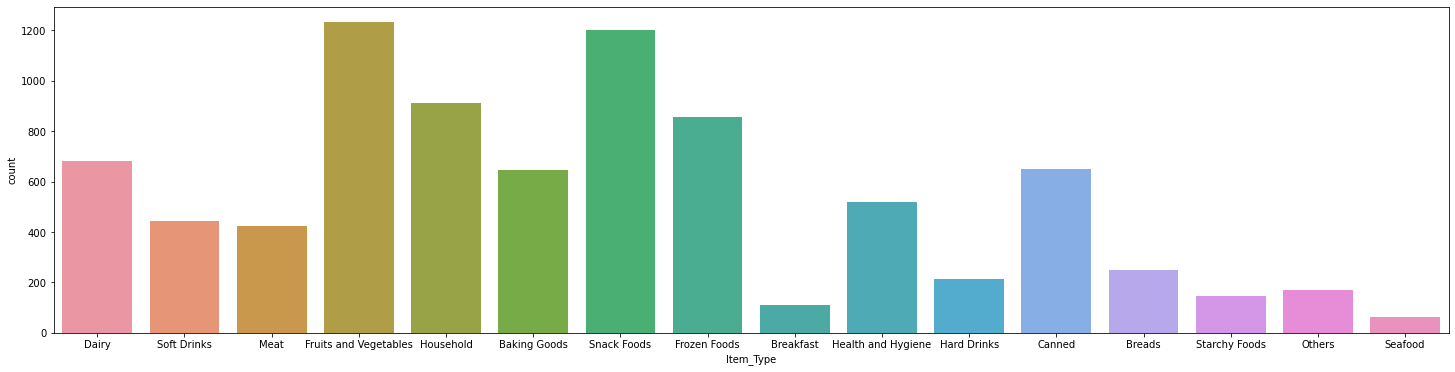

In [24]:
# Item_Type 
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=df)
plt.savefig('Item_Type.jpg', dpi=300)
plt.show()

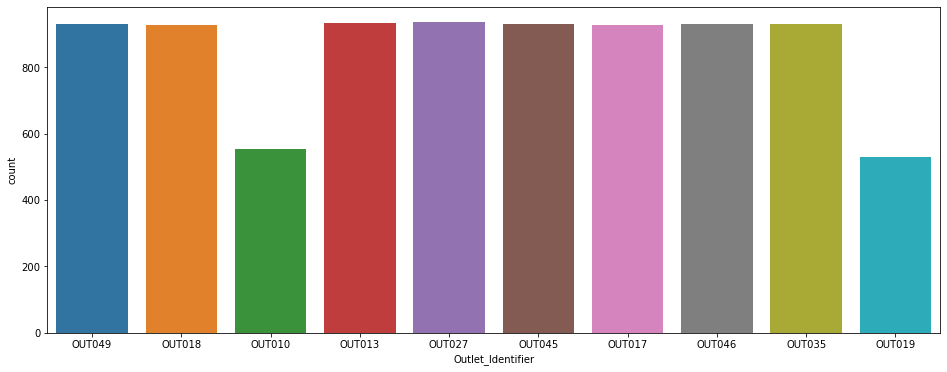

In [25]:
# Outlet Identifier
plt.figure(figsize=(16,6))
sns.countplot(x='Outlet_Identifier', data=df)
plt.savefig('Outlet_Identifier.jpg', dpi=300)
plt.show()

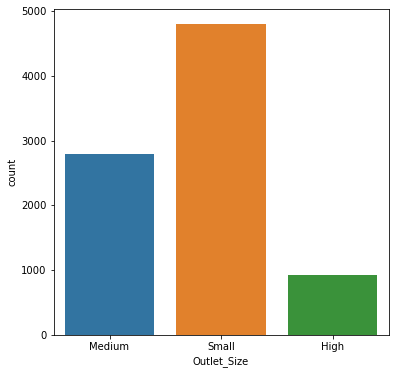

In [26]:
# Outlet_Size 
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.savefig('Outlet_Size.jpg')
plt.show()

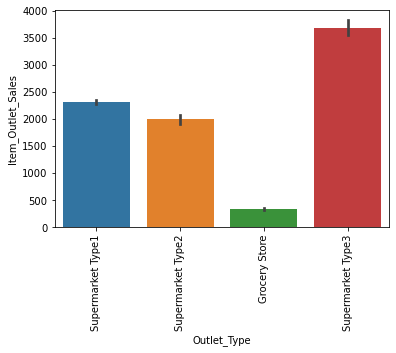

In [27]:
sns.barplot(y='Item_Outlet_Sales',x='Outlet_Type',data=df);
plt.xticks(rotation = 90)
plt.savefig('Item_Outlet_Sales_VS_Outlet_Type.jpg')
plt.show()

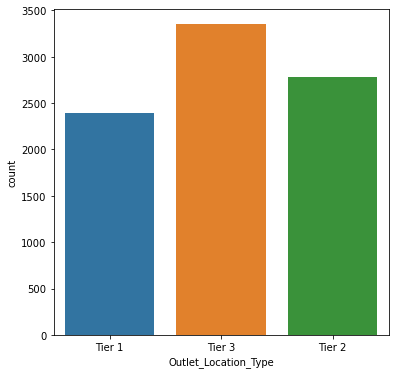

In [28]:
# Outlet_Location_Type
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=df)
plt.savefig('Outlet_Location_Type.jpg')
plt.show()

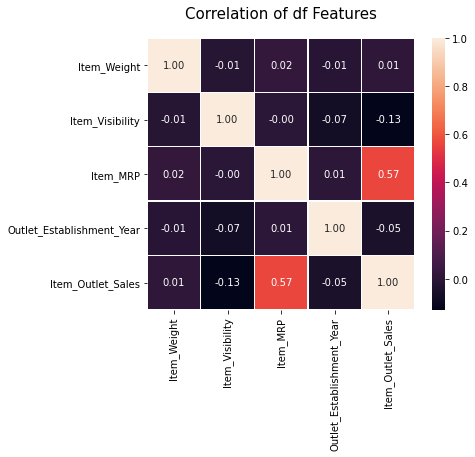

In [29]:
# Correlation

corr = df.corr()

plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)
plt.savefig('Correlation.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


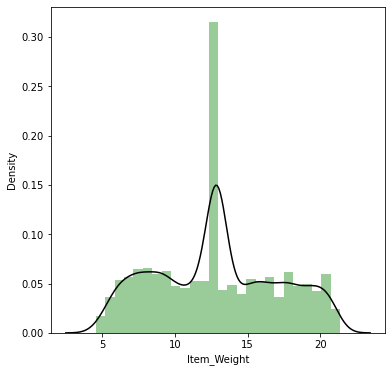

In [30]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'], color='green', kde_kws={"color": "k"})
plt.savefig('Item_Weight_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


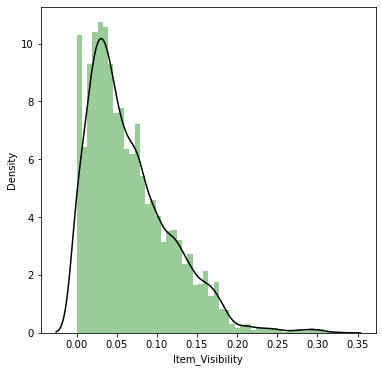

In [31]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'], color='green', kde_kws={"color": "k"})
plt.savefig('Item_Visibility_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


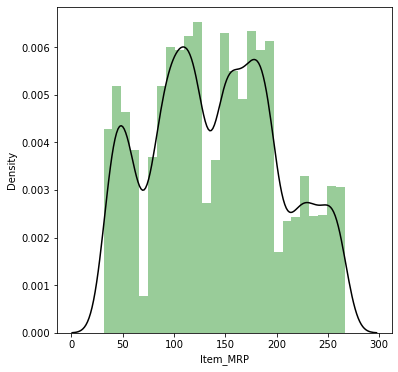

In [32]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'], color='green', kde_kws={"color": "k"})
plt.savefig('Item_MRP_dist.jpg')
plt.show()

C:\Users\dario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


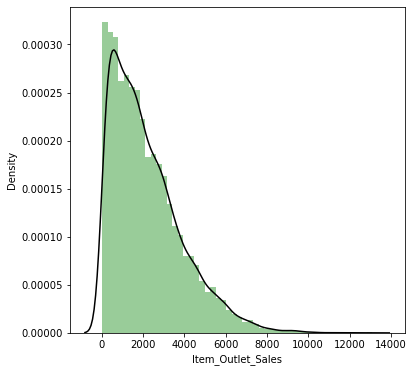

In [33]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'], color='green', kde_kws={"color": "k"})
plt.savefig('Item_Outlet_Sales_dist.jpg')
plt.show()

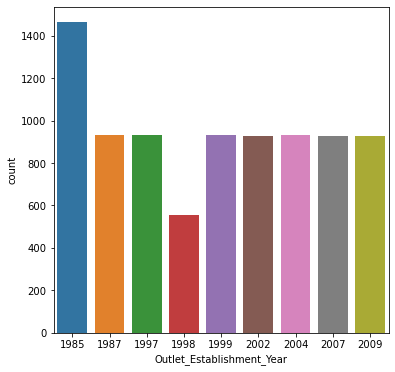

In [34]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.savefig('Outlet_Establishment_Year.jpg')
plt.show()

In [35]:
# Label Encoding

encoder = LabelEncoder()

df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [37]:
# Split the Features and Target
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [38]:
# Create Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [39]:
# Machine Learning using XGBoost Regressor
XGBR = XGBRegressor(n_estimators=100, max_depth=3, eta=0.1, subsample=1)
XGBR.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
# Prediction on training data
training_data_prediction = XGBR.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

print('R Squared value = ', r2_train)

R Squared value =  0.636445703064965


In [41]:
# Prediction on test data
test_data_prediction = XGBR.predict(X_test)

# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

print('R Squared value = ', r2_test)

R Squared value =  0.5867640905080416
